# Analysis of G2M Case Study
There are 4 datasets used to conduct the analysis of this case study which includes the data collected for two cab companies Pink cab and Yellow cab. 

The purpose of this analysis is to help XYZ company make informed decision in investing their money on one of the either cab company. The time period of data is from 31/01/2016 to 31/12/2018. 

The 4 datasets used are as follows:
1. Cab Dataset
2. City Dataset
3. Customer Dataset
4. Transaction Dataset

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import xlrd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

#For displaying image
from IPython.display import Image

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading dataset
cab_df=pd.read_csv("Cab_Data.csv")
cab_df['Date of Travel'] = cab_df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#loading dataset
city_df=pd.read_csv("City.csv")
cust_df=pd.read_csv("Customer_ID.csv")
trans_df=pd.read_csv("Transaction_ID.csv")

In [5]:
#Checking first 5 column of the dataset
display(city_df.head())
display(cust_df.head())
display(trans_df.head())

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [53]:
#Shape of all the dataset
print("Cab Data: ",cab_df.shape)
print("City Data: ",city_df.shape)
print("Customer Data: ",cust_df.shape)
print("Transaction Data: ",trans_df.shape)

Cab Data:  (359392, 7)
City Data:  (20, 3)
Customer Data:  (49171, 4)
Transaction Data:  (440098, 3)


### Are there any missing values in the dataset?

In [54]:
#Checking missing values for all the datasets
print(cab_df.isnull().sum())
print("-------------------------------------")
print(city_df.isnull().sum())
print("-------------------------------------")
print(cust_df.isnull().sum())
print("-------------------------------------")
print(trans_df.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
-------------------------------------
City          0
Population    0
Users         0
dtype: int64
-------------------------------------
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
-------------------------------------
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There are no missing values in the dataset.

### Are there any duplicate values in the dataset?

In [55]:
#Checking for duplicate data
print("Cab Dataset:",cab_df.duplicated().sum())
print("City Dataset:",city_df.duplicated().sum())
print("Customer Dataset:",cust_df.duplicated().sum())
print("Transaction Dataset:",trans_df.duplicated().sum())

Cab Dataset: 0
City Dataset: 0
Customer Dataset: 0
Transaction Dataset: 0


There are no duplicates values in the datasets.

## Creating Master Dataset
The three datasets are merged with primary key - foreign key relationship which are cab, customer and transaction datasets. The city dataset is not included as the data included is not that useful to us and we can get the city data from cab dataset.

In [6]:
master_df=pd.merge(cab_df,trans_df,on='Transaction ID',how='left')
master_df=pd.merge(master_df,cust_df,on='Customer ID',how='left')
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


## Feature Engineering
I am adding two columns to the master dataset i.e. 1) Profit and 2) Profit/km. 
1. Profit column is added because price charged and cost of trip column will be useful to us only when we know the profit gain from each ride.
2. Profit/km column is added because by knowing the profit achieved per km we can know how much pink and yellow cab company is making from their business and that will help us to decide in which company to invest

In [7]:
#Adding two columns
master_df['Profit']=master_df['Price Charged']-master_df['Cost of Trip']
master_df['Profit/km']=master_df['Profit']/master_df['KM Travelled']
master_df=master_df.sort_values(by="Date of Travel").reset_index(drop=True)

In [7]:
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit/km
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,66.6760,6.536863
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,4844,Cash,Male,32,5548,164.9960,10.576667
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,5671,Cash,Male,24,7081,195.7548,7.805215
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2761,Card,Male,40,11462,796.6140,17.021667
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,20687,Cash,Male,39,8926,122.0660,8.548039


In [15]:
#Writing the csv file
#master_df.to_csv('master_data.csv')

# Exploratory Data Analysis

In [18]:
import sweetviz as sv

With the help of sweetviz library, the report is generated for all the features of the dataset that will help us to understand distribution of all the variables.

In [19]:
master_dataset_report = sv.analyze(master_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:42  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   01:06  -> (00:00 left)


Creating Associations graph... DONE!


In [20]:
master_dataset_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


The report is included in the G2M case study folder and it shows the distribution of the data points, missing values, duplicate values, mean, median, mode and many more funcitonalities.

### Are the variables correlated with each other? 
Heatmap is used to check the correlation between all the variables.

Master Dataset


<AxesSubplot:>

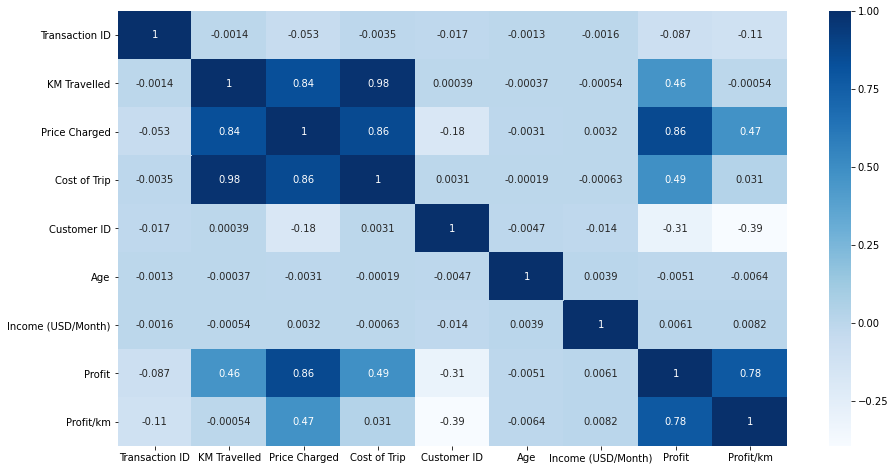

In [14]:
# Visualization of Correlations
print("Master Dataset")
plt.subplots(figsize=(15,8))
sns.heatmap(master_df.corr(),annot=True,cmap="Blues")

Only few variables shows the correlation and others are not that much correlated .
1. Variables KM Travelled and Cost of Trip has highest corelation of 98% which is evident that the price of the trip will be based on the KM travelled. ALso, variables KM Travelled and Price Charged have the second highest correlation of 86%.
2. We have derived two new variables Profit and Profit/km which would obviously have the correlation because profit/km is derived from the profit variable
3. Some of the variables have very low correlation because transaction ID and customer ID is just a reference number and it is not based on other variables

### Which company has more rides done so far from 31/01/2016 to 31/12/2018.?

In [9]:
#Number of data points for each company
master_df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

These are number of records for each cab company. So, there are 274681 rides for yellow cab and 84711 rides for pink cab.

Distribution in percentage
Yellow Cab    76.0
Pink Cab      24.0
Name: Company, dtype: float64


<AxesSubplot:xlabel='Company', ylabel='count'>

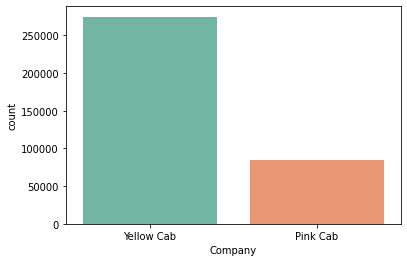

In [10]:
#Checking the distribution of both the companies
print("Distribution in percentage")
print(round((master_df['Company'].value_counts()*100)/len(master_df)))
sns.countplot(x='Company',data=master_df,palette="Set2")

With the help of bar graph, we can visualize that 76% of the data is for yellow cab and 24% of the data is for pink cab

##### Creating two dataframes for pink and yellow cab to easily test different hypothesis 

In [19]:
#Creating two dataframe for two companies
pink_cab_df=master_df[master_df['Company']=='Pink Cab']
pink_cab_df=pink_cab_df.sort_values(by="Date of Travel").reset_index(drop=True)
yellow_cab_df=master_df[master_df['Company']=='Yellow Cab']
yellow_cab_df=yellow_cab_df.sort_values(by="Date of Travel").reset_index(drop=True)

### Is there any pattern in the income of the people in deciding the cab company?

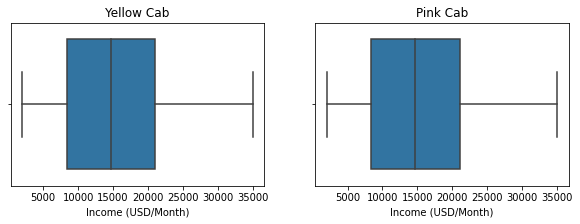

In [17]:
#box plot to check the income distribution
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(yellow_cab_df['Income (USD/Month)'])
plt.title("Yellow Cab")
plt.subplot(1,2,2)
sns.boxplot(pink_cab_df['Income (USD/Month)'])
plt.title("Pink Cab")
plt.show()

Both the box plot has similar distribution for the income of the people. Also, there are no outliers in the income variable. So, the income of the people does not matter when considering which can company should be selected for investment

## Analysis of the companies based on the profit they made per ride
This graph will help us understand if the company is getting profit or loss in number of rides. The lines below 0 in red indicates that it is a loss to the company, and lines above 0 in green indicates that it is a profit

##### For Pink Cab:

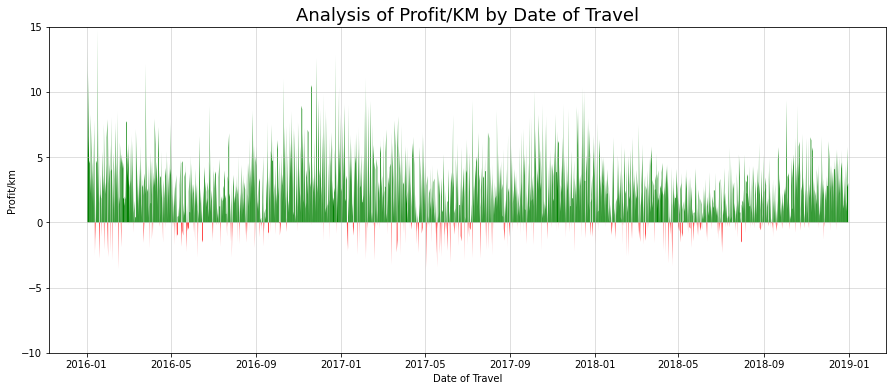

In [53]:
#Analysis of profit/km by date of travel. If there is a profit, it will be above 0 and if there is loss then it will be below 0 
plt.figure(figsize=(15,6))
plt.fill_between(pink_cab_df['Date of Travel'], pink_cab_df['Profit/km'],0, where=pink_cab_df['Profit/km'] >= 0,interpolate=True,facecolor='green')
plt.fill_between(pink_cab_df['Date of Travel'],pink_cab_df['Profit/km'],0, where=pink_cab_df['Profit/km'] <= 0, interpolate=True,facecolor='red')
plt.ylim(-10,15)
plt.title("Analysis of Profit/KM by Date of Travel", fontsize=18)
plt.ylabel('Profit/km')
plt.xlabel('Date of Travel')
plt.grid(alpha=0.5)
plt.show()


##### For Yellow Cab:

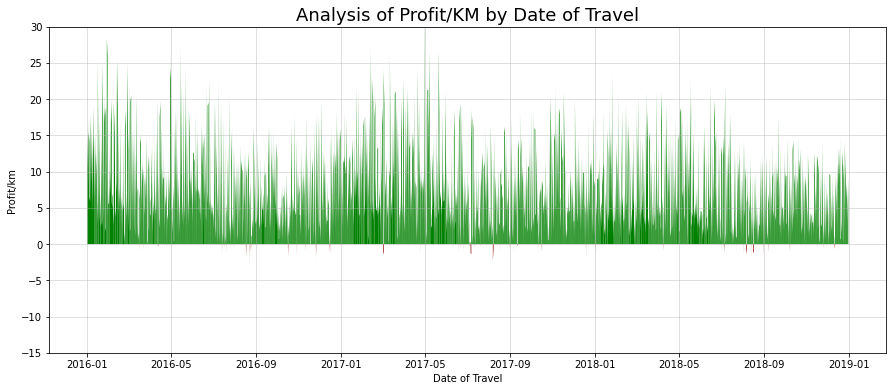

In [54]:
#Analysis of profit/km by date of travel. If there is a profit, it will be above 0 and if there is loss then it will be below 0 
plt.figure(figsize=(15,6))
plt.fill_between(yellow_cab_df['Date of Travel'], yellow_cab_df['Profit/km'],0, where=yellow_cab_df['Profit/km'] >= 0,interpolate=True,facecolor='green')
plt.fill_between(yellow_cab_df['Date of Travel'],yellow_cab_df['Profit/km'],0, where=yellow_cab_df['Profit/km'] <= 0, interpolate=True,facecolor='darkred')
plt.ylim(-15,30)
plt.title("Analysis of Profit/KM by Date of Travel", fontsize=18)
plt.ylabel('Profit/km')
plt.xlabel('Date of Travel')
plt.grid(alpha=0.5)
plt.show()


After seeing both the graph for pink and yellow cab, we can say that pink cab is suffering more loss than yellow cab. 

## Does the Age and gender of the person effect the companies customer base?

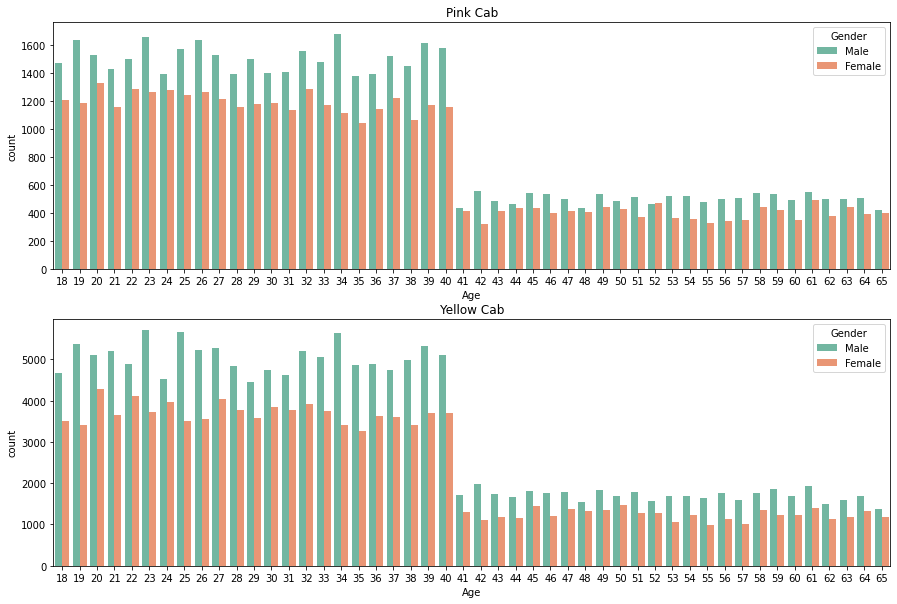

In [56]:
#plot to check the frequency of users based on the age and gender
fg, axs = plt.subplots(2, 1, figsize=(15, 10))
sns.countplot('Age',hue='Gender',data=pink_cab_df,palette='Set2',ax=axs[0]).set_title('Pink Cab')
sns.countplot('Age',hue='Gender',data=yellow_cab_df,palette='Set2',ax=axs[1]).set_title('Yellow Cab')
plt.show()

The distribution of the user based on age and gender almost looks similar, only the yellow cab has more users. Apart from their other insights are as follows:
1. Male users are comparatively more than female users
2. The people in the age group of 18 to 40 tend to use more cabs then people in the age group of 41 to 65

# -------------------------- Visualization carried out on BI Tools -------------------------------
To better analyze the company and help client to make the informed decision, Microsoft Power BI tool is used to generate the below charts.

### Analysis of Unique customers for pink and yellow cab in each city 
The horizontal bar chart is used to know the number of unique users by different cities of US.

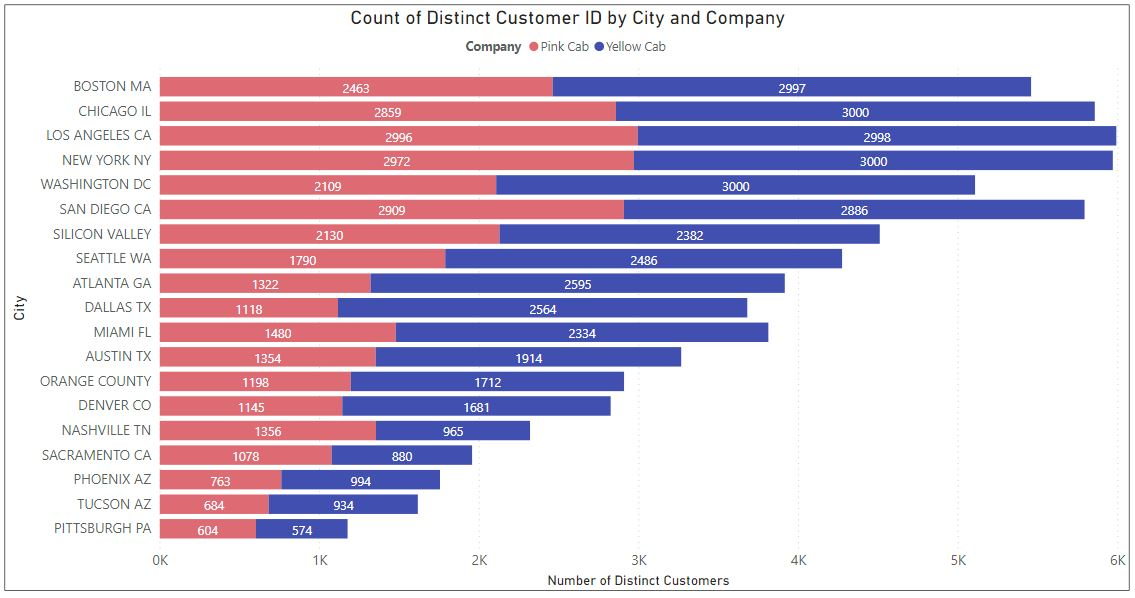

In [47]:
Image(filename='visualization/users_by_city.jpg') 

The pink cab company has comparitively less distinct users than yellow cab company except 4 cities Pittsburgh, Sacramento, Nashville and San Diego.

### Analysis of the number of users in each month 
The below line graph will help us to identify the pattern of users by month.

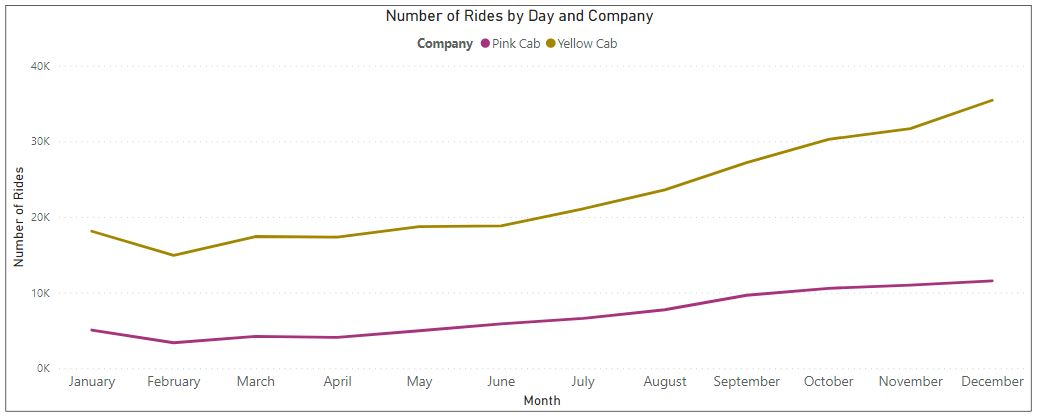

In [48]:
Image(filename='visualization/rides_by_month.jpg') 

We can see from the graph that the users for yellow cab company is increasing rapidly towards the end of the year whereas for pink cab company, it is increasing slowly. December is the month which has the highest user, this is probably because of Christmas holidays.

### Analysis of the number of users by day
The line graph below helps us to understand the number of rides by days.

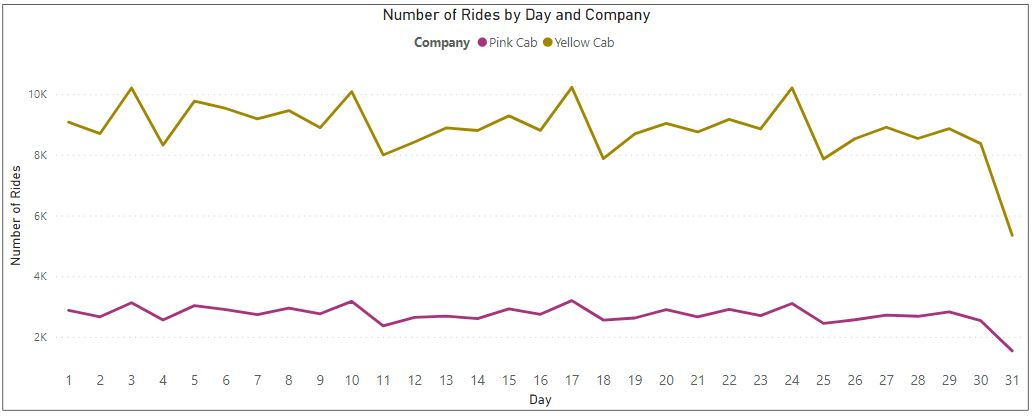

In [49]:
Image(filename='visualization/rides_by_day.jpg') 

As we know, there are more users for yellow cab company than pink cab company, the lines are far away from each other. Both the companies has almost similar kind of pattern. 3rd, 10th, 17th and 24th day of the month have the more number of rides compare to other days. Also, there are sudden decline on 31st date, I believe this is because not all months has 31 days and that might be the reason for showing less rides.

### Analysis of the Impact of KM Travelled by a number of user for both the companies

The column chart help us categorize the number of users by how long they have travelled in the cabs and also we can determine whether users preferred to take long or short ride.

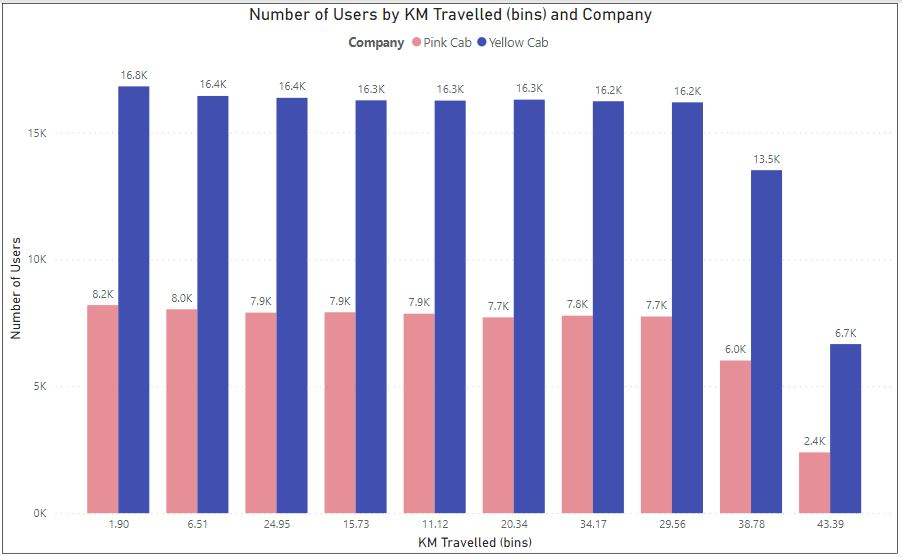

In [50]:
Image(filename='visualization/users_by_km.jpg') 

From the graph, we can see that the highest number of users preferred short rides upto 5 to 6 kms. Moreover, there are approoximately same number of users for 6 to 25 km. There are slight decrease in number of users with 30 to 40 km and sudden decrease in number of users for more than 40kms.

Overall, most people prefer to take rides in cab upto approximately 40 kms.

### Dashboard for Pink Cab 
This will give the overall performance of the Pink Cab company. 

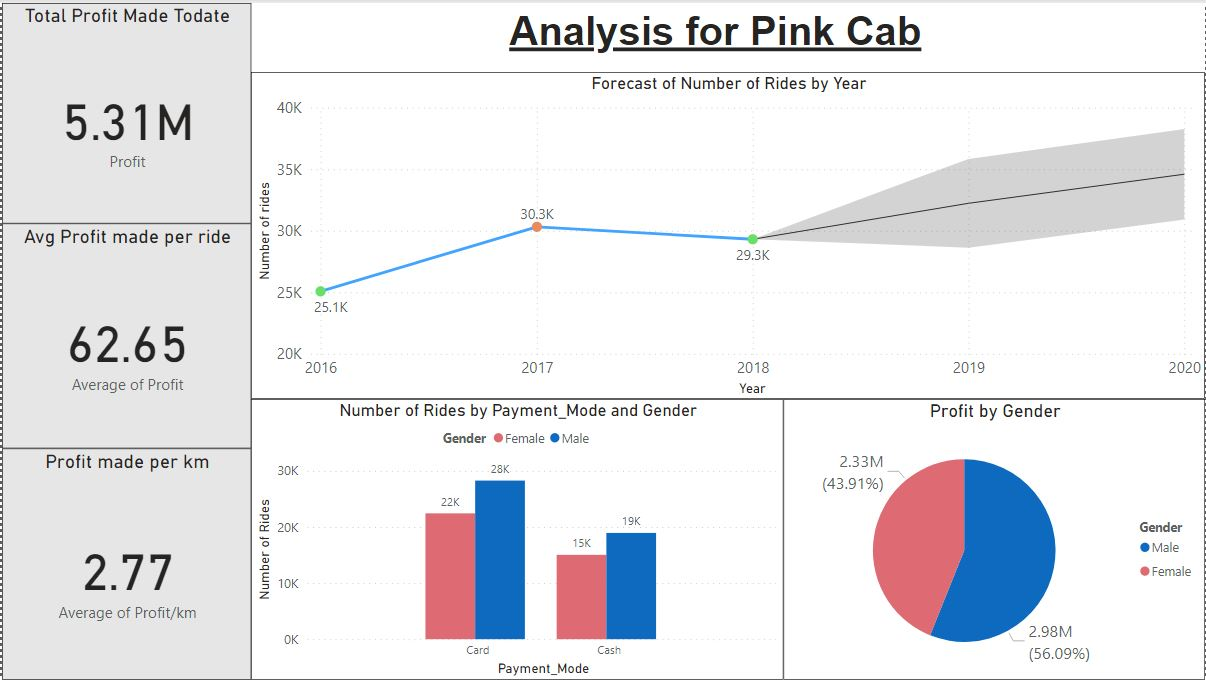

In [51]:
Image(filename='visualization/Pink_cab_dashboard.jpg') 

Below are the insights for Pink cab company:
1. They have made 5.31 M dollar profit between the time frame given
2. Average profit they made per ride is 62.65 dollar
3. On average per km they make 2.22 dollar profit
4. The number of rides forecasted for the year 2019 and 2020 is roughly around 28k to 38k
5. More people prefer to pay through card then cash
6. 44% of profit comes from female users while 56% of profit comes from male users

### Dashboard for Yellow Cab

This will give the overall performance of the Yellow Cab company.

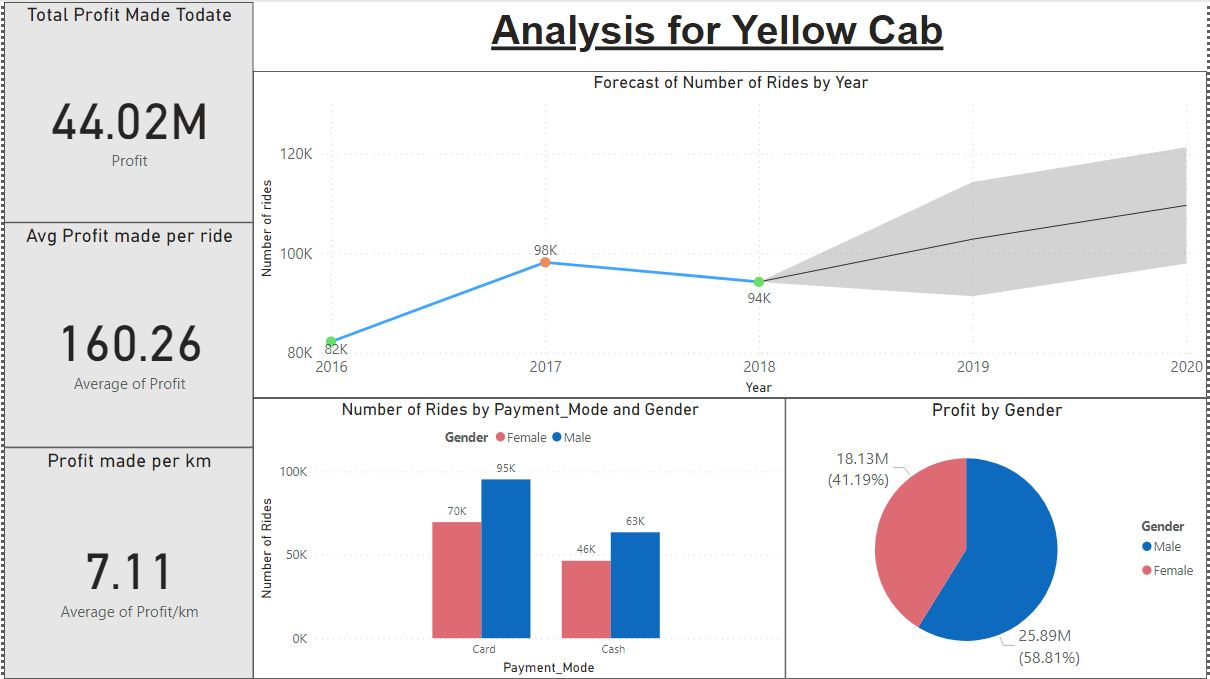

In [52]:
Image(filename='visualization/Yellow_cab_dashboard.jpg') 

Below are the insights for Yellow cab company:

1. They have made 44.02 M dollar profit between the time frame given
2. Average profit they made per ride is 160.26 dollar
3. On average per km they make 7.11 dollar profit
4. The number of rides forecasted for the year 2019 and 2020 is roughly around 90k to 120k
5. More people prefer to pay through card then cash
6. 41% of profit comes from female users while 59% of profit comes from male users

# ---------------------------------------Recommendation--------------------------------------------

I would recommend XYZ company to invest in the yellow cab company based on their larger customer base, more profits and less loss per rides. Also, average profit per km and forecasting of rides for next two years for yellow cab company is three times higher than pink cab company.